<a href="https://colab.research.google.com/github/cinnoman/ML-based-phishing-attack-detection/blob/main/phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("phishing.csv")
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [11]:
df.shape
df.isnull().sum()

,0
Index,0
UsingIP,0
LongURL,0
ShortURL,0
Symbol@,0
Redirecting//,0
PrefixSuffix-,0
SubDomains,0
HTTPS,0
DomainRegLen,0


In [13]:
X= df.drop(columns='class')
Y=df['class']
Y=pd.DataFrame(Y)
Y.head()

,class
0,-1
1,-1
2,-1
3,1
4,1


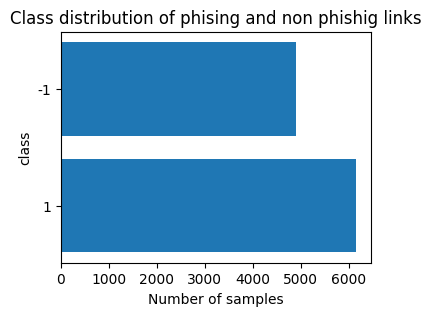

In [23]:
import matplotlib.pyplot as plt
is_phishing = df['class'].value_counts()
plt.figure(figsize=(4, 3))
plt.barh(is_phishing.index.astype(str), is_phishing.values)
plt.xlabel("Number of samples")
plt.ylabel("class")
plt.title("Class distribution of phising and non phishig links")
plt.show()

In [25]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_scaled, Y)

scores = selector.scores_
p_values = selector.pvalues_

feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores, 'P-value': p_values})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

feature_scores

,Feature,Score,P-value
8,HTTPS,1876.217615,0.000000e+00
14,AnchorURL,1469.178956,0.000000e+00
6,PrefixSuffix-,1165.194900,2.236202e-255
16,ServerFormHandler,386.111827,5.812299e-86
9,DomainRegLen,376.944924,5.755808e-84
26,WebsiteTraffic,352.061697,1.507230e-78
7,SubDomains,308.717981,4.154375e-69
13,RequestURL,288.809818,9.034165e-65
15,LinksInScriptTags,225.717701,5.120096e-51
27,PageRank,89.704929,2.764654e-21


In [30]:
from sklearn.model_selection import train_test_split,cross_val_score

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 31)
(3317, 31)
(7737, 1)
(3317, 1)


In [31]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [35]:
lr=LogisticRegression()
logistic_regression=lr.fit(train_X,train_Y)
lr_predict= lr.predict(test_X)
accuracy_score(lr_predict,test_Y)
print(classification_report(logreg_predict,test_Y))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      1400
           1       0.95      0.92      0.94      1917

    accuracy                           0.93      3317
   macro avg       0.92      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



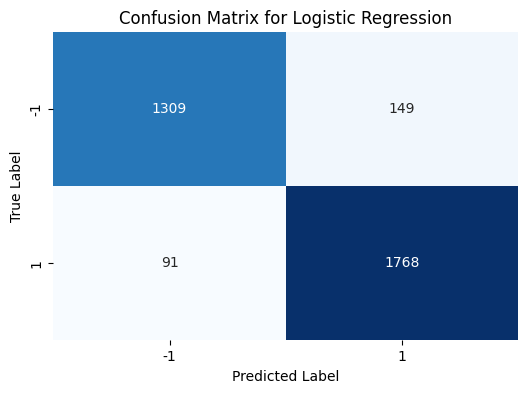

In [38]:
conf_matrix = confusion_matrix(test_Y, lr_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(train_X, train_Y.values.ravel())

rf_predict = rf_classifier.predict(test_X)

rf_accuracy = accuracy_score(test_Y, rf_predict)
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report for Random Forest Classifier:")
print(classification_report(test_Y, rf_predict))

Random Forest Classifier Accuracy: 0.9717

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

          -1       0.97      0.96      0.97      1458
           1       0.97      0.98      0.97      1859

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



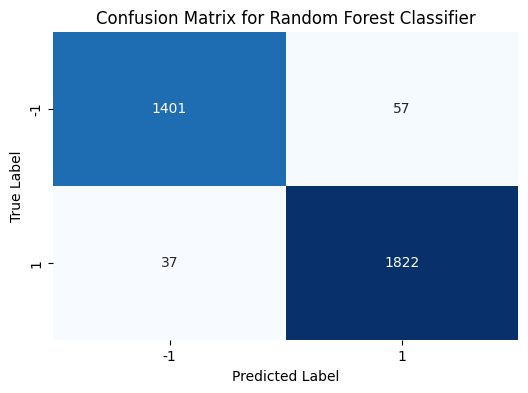

In [46]:
conf_matrix_rf = confusion_matrix(test_Y, rf_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(train_X, train_Y.values.ravel())

dt_predict = dt_classifier.predict(test_X)

dt_accuracy = accuracy_score(test_Y, dt_predict)
print(f"Decision Tree Classifier Accuracy: {dt_accuracy:.4f}")
print("\nClassification Report for Decision Tree Classifier:")
print(classification_report(test_Y, dt_predict))

Decision Tree Classifier Accuracy: 0.9478

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

          -1       0.95      0.93      0.94      1458
           1       0.94      0.96      0.95      1859

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



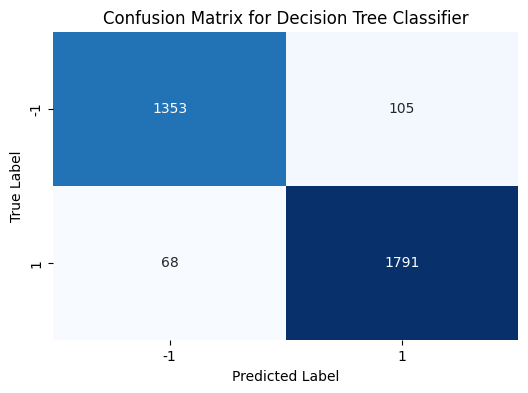

In [48]:
conf_matrix_dt = confusion_matrix(test_Y, dt_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(train_X, train_Y.values.ravel())

knn_predict = knn_classifier.predict(test_X)

knn_accuracy = accuracy_score(test_Y, knn_predict)
print(f"K-Nearest Neighbors Classifier Accuracy: {knn_accuracy:.4f}")
print("\nClassification Report for K-Nearest Neighbors Classifier:")
print(classification_report(test_Y, knn_predict))

K-Nearest Neighbors Classifier Accuracy: 0.6051

Classification Report for K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

          -1       0.55      0.53      0.54      1458
           1       0.64      0.67      0.65      1859

    accuracy                           0.61      3317
   macro avg       0.60      0.60      0.60      3317
weighted avg       0.60      0.61      0.60      3317



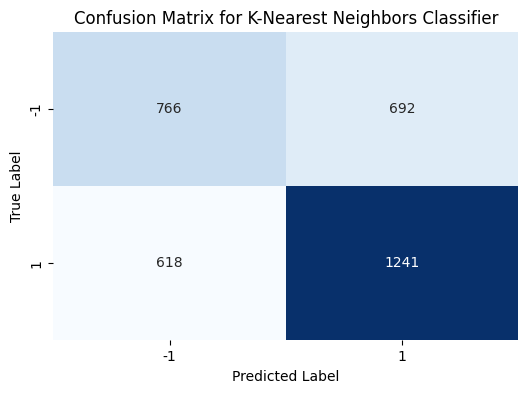

In [50]:
conf_matrix_knn = confusion_matrix(test_Y, knn_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for K-Nearest Neighbors Classifier')
plt.show()